In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)


In [2]:
df1=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1.groupby("size")["size"].agg("count")

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [6]:
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df2=df1.drop(["area_type","society","balcony","availability"],axis="columns")
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3=df2.dropna()

In [10]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df3['BHK']=df3["size"].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-12-9273b2cfa9d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']=df3["size"].apply(lambda x: int(x.split(' ')[0]))


In [13]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df3[df3.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [15]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x) :
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df3[~df3["total_sqft"].apply(is_float)].head(30)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [18]:
def convert_sqrt_to_num(x):
    
    tokens = x.split(" - ")
    
    if len(tokens)==2:
        
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [19]:
convert_sqrt_to_num("8000")

8000.0

In [20]:
convert_sqrt_to_num("2100 - 2850")


2475.0

In [21]:
convert_sqrt_to_num("34.46Sq. Meter")

In [22]:
df4=df3.copy()

In [23]:
df4["total_sqft"]=df4["total_sqft"].apply(convert_sqrt_to_num)

In [24]:
df4.head(2)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [25]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [26]:
df5=df4.copy()

In [27]:
df5["price_per_sqft"]=df5["price"]*100000/df5["total_sqft"]

In [28]:
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [29]:
len(df5.location.unique())

1304

In [30]:
df5.location=df5.location.apply(lambda x:x.strip())

In [31]:
df5.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [32]:
location_stats=df5.groupby("location")["location"].agg("count").sort_values(ascending=False)

In [33]:
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [34]:
len(location_stats[location_stats<=10])

1052

In [35]:
location_stats_less_than_10=location_stats[location_stats<=10]

In [36]:
len(df5.location.unique())

1293

In [37]:
df5.location=df5.location.apply(lambda x : "other" if x in location_stats_less_than_10 else x)

In [38]:
len(df5.location.unique())

242

In [39]:
df5.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [40]:
df5[df5.total_sqft/df5.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [41]:
df5.shape

(13246, 7)

In [42]:
df6=df5[~(df5.total_sqft/df5.BHK<300)]
df6.shape

(12502, 7)

In [43]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [44]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for keys,subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


In [45]:
df7=remove_pps_outliers(df6)

In [46]:
df7.price_per_sqft.describe()

count    10241.000000
mean      5657.702572
std       2266.476980
min       1250.000000
25%       4244.762955
50%       5172.413793
75%       6426.099852
max      24509.803922
Name: price_per_sqft, dtype: float64

In [47]:
df7.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [48]:
df7.shape

(10241, 7)

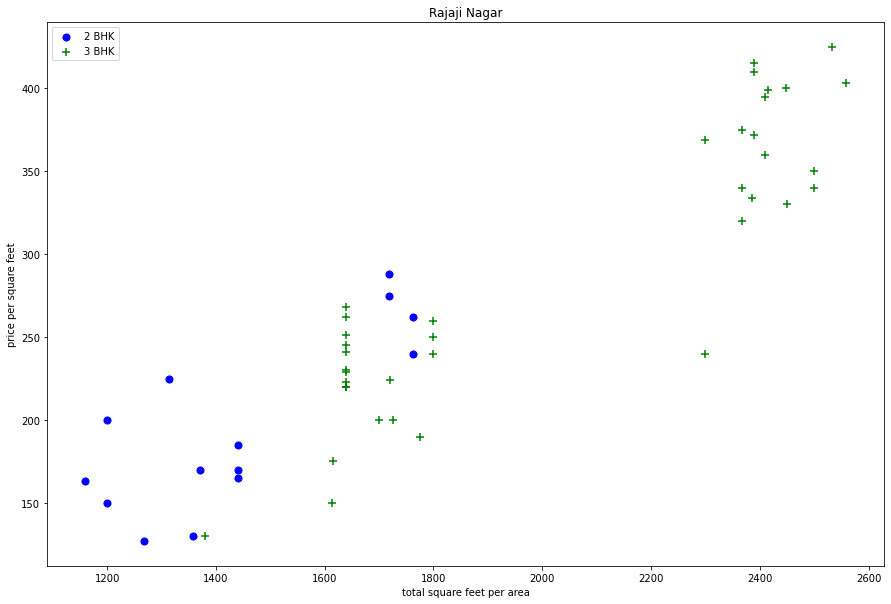

In [49]:
def plot_scatter_chart(df,location):
    BHK2=df[(df.location==location) &(df.BHK==2)]
    BHK3=df[(df.location==location) &(df.BHK==3)]
    matplotlib.rcParams["figure.figsize"]=(15,10)
    plt.scatter(BHK2.total_sqft,BHK2.price,color="blue",label="2 BHK",s=50)
    plt.scatter(BHK3.total_sqft,BHK3.price,marker="+",color="green",label="3 BHK",s=50)
    plt.xlabel("total square feet per area")
    plt.ylabel("price per square feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [50]:
def remove_BHK_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby("location"):
        BHK_stats={}
        for BHK,BHK_df in location_df.groupby("BHK"):
            BHK_stats[BHK]={
                "mean":np.mean(BHK_df.price_per_sqft),
                "std":np.std(BHK_df.price_per_sqft),
                "count":BHK_df.shape[0]
            }
        for BHK,BHK_df in location_df.groupby("BHK"):
            stats=BHK_stats.get(BHK-1)
            if stats and stats["count"]>5:
                exclude_indices=np.append(exclude_indices,BHK_df[BHK_df.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(exclude_indices,axis="index")

df8=remove_BHK_outliers(df7)
df8.shape
        

(7329, 7)

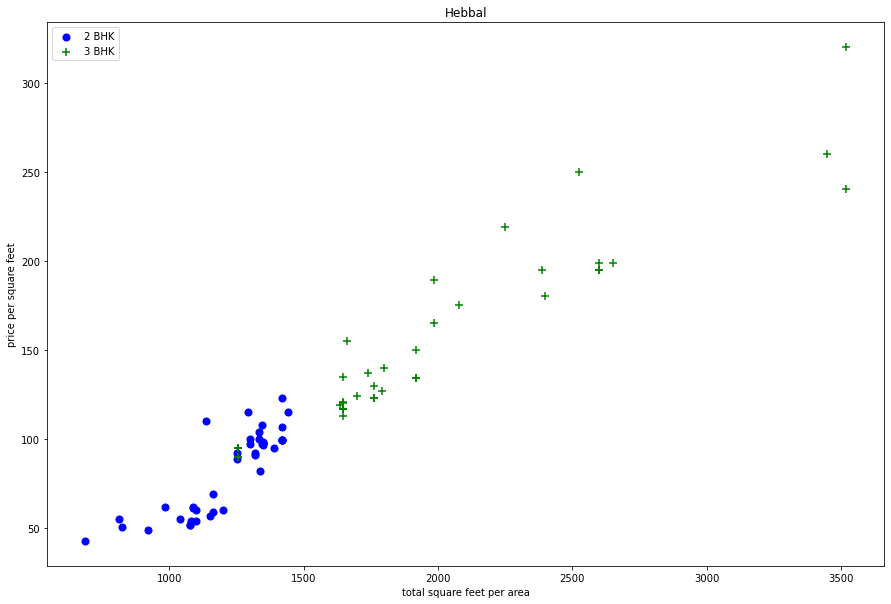

In [51]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'count')

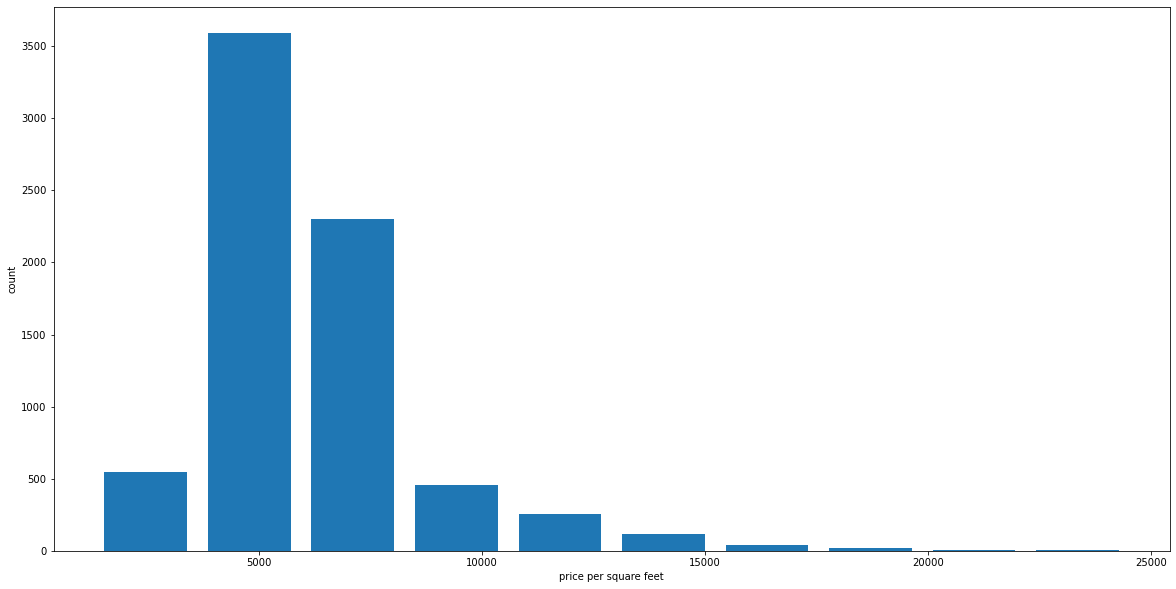

In [52]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("price per square feet")
plt.ylabel("count")


In [53]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [54]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

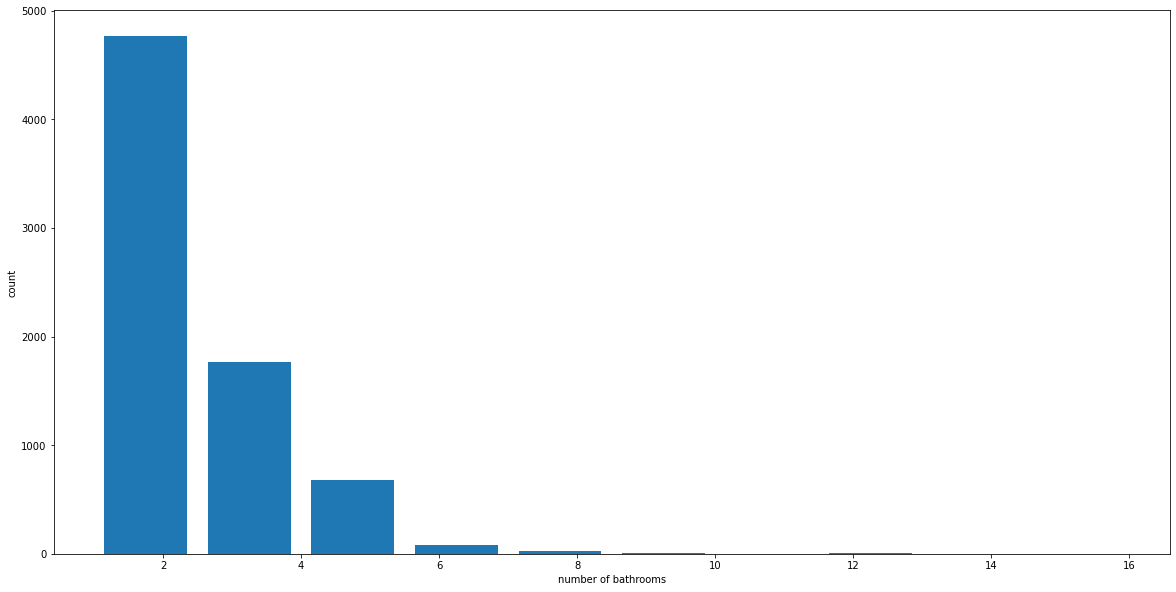

In [55]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("number of bathrooms")
plt.ylabel("count")

In [56]:
df8[df8.bath>df8.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [57]:
df9=df8[df8.bath<df8.BHK+2]

In [58]:
df9.shape

(7251, 7)

In [59]:
df10=df9.drop(["size","price_per_sqft"],axis="columns")
df10.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [60]:
dummies=pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df11 = pd.concat([df10,dummies.drop("other",axis="columns")],axis="columns")
df11.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df12 = df11.drop("location",axis="columns")
df12.head(2)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df12.shape

(7251, 245)

In [65]:
x = df12.drop("price",axis="columns")
x.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=10)

In [68]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()

lr_clf.fit(x_train,y_train)

lr_clf.score(x_train,y_train)

0.8541850010771193

In [69]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

cross_val_score(LinearRegression(),x,y,cv=cv)


array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [72]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def find_best_model(x,y):
    algos= {
        "LinearRegression" : {
            "model" : LinearRegression(),
            "params" : {
                "normalize" : [True,False]
               
            }
        },
        "Lasso" : {
            "model" : Lasso(),
            "params" : {
                "alpha" : [1,2],
                "selection" : ["random","cyclic"]
            }
        },
        "decision_tree":{
            "model" : DecisionTreeRegressor(),
            "params" :{
                "criterion" : ["mse","friedman_mse"],
                "splitter" : ["best","random"]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5 , test_size = 0.20,random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config["model"],config["params"],cv=cv,return_train_score = False)
        gs.fit(x,y)
        scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params" : gs.best_params_
        })
    
    return pd.DataFrame(scores,columns = ["model","best_score","best_params"])
   
find_best_model(x_train,y_train)

,model,best_score,best_params
0,LinearRegression,0.845912,{'normalize': False}
1,Lasso,0.697254,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.677760,"{'criterion': 'mse', 'splitter': 'random'}"


In [75]:
x.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [80]:
np.where(x.columns == "2nd Phase Judicial Layout")[0][0]

5

In [83]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns == location)[0][0]
    
    z = np.zeros(len(x.columns))
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if loc_index >= 0:
        z[loc_index] = 1
        
    return lr_clf.predict([z])[0]

In [84]:
predict_price("1st Phase JP Nagar",1000, 2, 2)

83.49904677179224

In [88]:
import pickle
with open("banglore_house_prediction.pickle","wb") as f:
    pickle.dump(lr_clf,f)
    

In [86]:
import json
columns = {
    "data_columns" : [col.lower() for col in x.columns]
}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))